In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df  = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
110,15665416,Female,39,71000,0
105,15801658,Male,21,72000,0
138,15610403,Female,28,59000,0
286,15631070,Female,37,62000,0
359,15709183,Male,42,54000,0


In [5]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [6]:
pd.crosstab(df["Age"],df["Purchased"]).head()

Purchased,0,1
Age,,
18,5,0
19,7,0
20,7,0
21,4,0
22,5,0


# Zero means False one maens True 

Text(0, 0.5, 'Purchased')

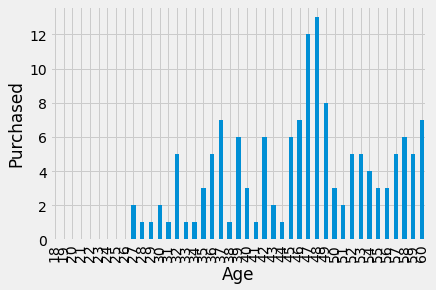

In [7]:
plt.style.use("fivethirtyeight")
pd.crosstab(df["Age"],df["Purchased"])[1].plot(kind="bar")
plt.ylabel("Purchased")

In [8]:
import sweetviz as sv 

In [9]:
report = sv.analyze(df)

Done! Use 'show' commands to display/save.   |██| [100%]   00:00 -> (00:00 left)


In [10]:
report.show_html(layout="vertical")

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
# df.loc[:,["Age","EstimatedSalary","Purchased"]]

In [13]:
df = df.iloc[:,2:]

In [14]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
x = df.iloc[:,:2]

In [16]:
y = df.iloc[:,-1]

In [17]:
# df["Purchased"]

In [18]:
x 

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Train, Test, Split 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

# StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
# fit the sc to the train set, it will learn the parameters.

sc.fit(X_train)
# No need to fit the X_test data because sc learn the pattern 
# when we insert X_train 

# transform train and test sets.
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

In [26]:
X_train_scale.shape

(320, 2)

# After standardrization Dataframe is convert into numpy array, so before fit into model we need to convert again into Dataframe

In [27]:
sc.mean_

array([3.8218750e+01, 6.9928125e+04])

In [28]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [29]:
type(X_train)

pandas.core.frame.DataFrame

In [30]:
type(y_train)

pandas.core.series.Series

# Model created with Non scaled values

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print("Accuracy without scale: ", accuracy_score(y_test,y_pred))

Accuracy without scale:  0.725


# X_train_scale shaoud be in Dataframe format

In [39]:
X_train_scale

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [40]:
type(X_test_scale)

numpy.ndarray

In [41]:
# Convert into DataFrame 

In [42]:
X_train_scale.shape

(320, 2)

In [43]:
X_train_scale = pd.DataFrame(X_train_scale,columns=["Age","EstimatedSalary"])

In [44]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [45]:
X_train_scale

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [46]:
pd.merge(X_train,X_train_scale,left_index=True,right_index=True).head()

,Age_x,EstimatedSalary_x,Age_y,EstimatedSalary_y
64,59,83000,-0.312897,0.060027
55,24,55000,-0.993372,-0.316610
106,26,35000,-0.701740,-1.504465
300,58,38000,1.048053,-0.896052
229,42,80000,-0.118476,0.146943


# Model Trained with Scale value

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model_sc = LogisticRegression()

In [49]:
model_sc.fit(X_train_scale,y_train)

LogisticRegression()

In [54]:
y_pred = model_sc.predict(X_test_scale)

In [55]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [56]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score

In [65]:
print("Accuracy with scaled data :",accuracy_score(y_test,y_pred))

Accuracy with scaled data : 0.925


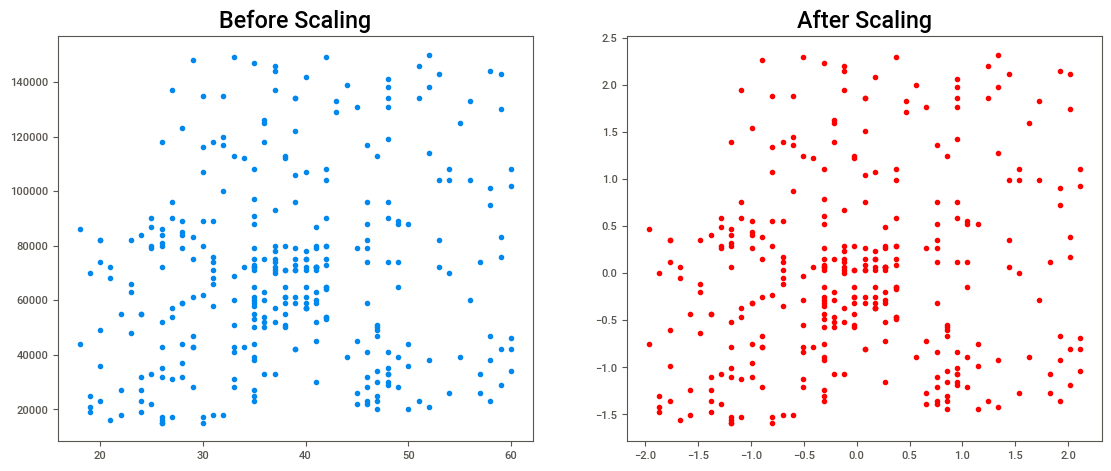

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scale['Age'], X_train_scale['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()